# Polynomial regression

An obious way to enhance the simple regression model {eq}`simple-lin-reg` is to add more powers of predictor $\boldsymbol x$. For example, consider **quadratic regression**

```{math}
    :label: quad-reg
    y = w_0 + w_1 x + w_2 x^2.
```

Now the model has three parameters $\boldsymbol w = (w_0, w_1, w_2)$, which could be also fitted by optimizing of MSE:

```{math}
:label: quad-mse
\mathcal L(\boldsymbol w) =  \frac 1n\sum\limits_{i=1}^n (y_i  - w_0 - w_1x_i - w_2x_i^2)^2 \to \min\limits_{\boldsymbol w}.
```

(boston-quadratic)=
## Revisit Boston dataset

The data look quite suitable for a quadratic regression. Let's do a simple feature engineering and add new feature of squares. Now the design matrix has two columns:

$$
\boldsymbol X = [\boldsymbol x\; \boldsymbol x^2] = \begin{pmatrix}
x_1 & x_1^2 \\
x_2 & x_2^2 \\
\vdots & \vdots \\
x_n & x_n^2
\end{pmatrix}.
$$

To fit the linear regression on the new dataset, once again use `sklearn` library:

In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

boston = pd.read_csv("../ISLP_datsets/Boston.csv")

x = boston['lstat']
y = boston['medv']

LR = LinearRegression()
x_reshaped = x.values.reshape(-1, 1)
x_train = np.hstack([x_reshaped, x_reshaped**2])
LR.fit(x_train, y)
print("intercept:", LR.intercept_)
print("coefficients:", LR.coef_)
print("r-score:", LR.score(x_train, y))
print("MSE:", np.mean((LR.predict(x_train) - y) ** 2))

intercept: 42.86200732816934
coefficients: [-2.3328211   0.04354689]
r-score: 0.6407168971636611
MSE: 30.330520075853716


Our metrics have improved, now plot the graphs:

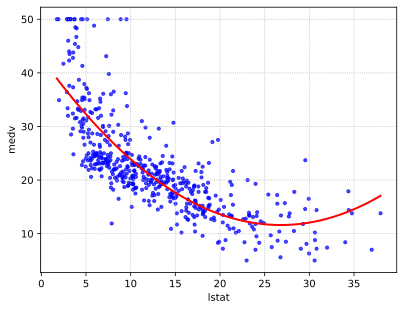

In [64]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
plt.scatter(x, y, s=10, c='b', alpha=0.7)
xs = np.linspace(x.min(), x.max(), num=100)
plt.plot(xs, LR.intercept_ + LR.coef_[0]*xs + LR.coef_[1]*xs**2, c='r', lw=2)
plt.xlabel("lstat")
plt.ylabel("medv")
plt.grid(ls=":");

## General case

Of course, the degree of the polynomial can be any number $m\in\mathbb N$. The model of the polynomial regression is

```{math}
    :label: poly-reg
    y = w_0 + w_1 x + w_2 x^2 + \ldots + w_m x^m = \sum\limits_{k=0}^m w_k x^k.
```

**Q.** How many parameters does this model have?

In case of MSE loss the model is fitted via minimizing the function

```{math}
:label: poly-mse
\mathcal L(\boldsymbol w) =  \frac 1n\sum\limits_{i=1}^n \Big(y_i  - \sum\limits_{k=0}^m w_k x^k\Big)^2 \to \min\limits_{\boldsymbol w}.
```

Regression can be broken into two categories: linear and non-linear. Polynomial regression is non-linear regression, where dependent and independet variables have non-linear relationship. 

In non-linear relationships, the change in the independent variable (usually x) is not associated with a constant rate of change in the dependent variable (y). Instead, the relationship can take various forms, such as curves, exponential growth or decay, logarithmic patterns, and more.

In [65]:
from jupyterquiz import display_quiz
import json
from base64 import b64encode

<span style="display:none" id="q_3">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyByZWd1bGFyaXphdGlvbiBpbiBQb2x5bm9taWFsIFJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJJdCBpcyBjb21tb24gdG8gdXNlIHRyaWFsIGFuZCBlcnJvciBvciBjcm9zcy12YWxpZGF0aW9uIHRvIGZpbmQgdGhlIGJlc3QgZGVncmVlIGZvciB0aGUgcG9seW5vbWlhbCIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiSXMgYSB0ZWNobmlxdWUgdXNlZCB0byBwcmV2ZW50IG92ZXJmaXR0aW5nIGluIFBvbHlub21pYWwgUmVncmVzc2lvbiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiSXMgYSB0ZWNobmlxdWUgdXNlZCBmb3IgcHJlZGljdGluZyBjb250aW51b3VzIHZhcmlhYmxlcyIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiSXMgdGVjaG5pcXVlIHVzZWQgZm9yIG1vZGVsaW5nIHJlbGF0aW9uc2hpcHMgYmV0d2VlbiB2YXJpYWJsZXMgaW4gdGhlIHBoeXNpY2FsIHNjaWVuY2VzLCBzdWNoIGFzIHRlbXBlcmF0dXJlLCBwcmVzc3VyZSwgYW5kIHRpbWUiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0In1dfV0=</span>

<span style="display:none" id="q_1">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyBwb2x5bm9taWFsIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJBIHJlZ3Jlc3Npb24gdGVjaG5pcXVlIGV4Y2x1c2l2ZWx5IHVzZWQgZm9yIGxpbmVhciByZWxhdGlvbnNoaXBzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdCJ9LCB7ImFuc3dlciI6ICJBIG1ldGhvZCB0byBjYWxjdWxhdGUgdGhlIHJvb3RzIG9mIGEgcG9seW5vbWlhbCBlcXVhdGlvbiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiQSBzdGF0aXN0aWNhbCB0ZXN0IGZvciBjaGVja2luZyBtdWx0aWNvbGxpbmVhcml0eSIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QifSwgeyJhbnN3ZXIiOiAiQSB0eXBlIG9mIHJlZ3Jlc3Npb24gdGhhdCB1c2VzIHBvbHlub21pYWxzIHRvIG1vZGVsIHRoZSByZWxhdGlvbnNoaXAgYmV0d2VlbiB0aGUgaW5kZXBlbmRlbnQgYW5kIGRlcGVuZGVudCB2YXJpYWJsZXMiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0In1dfV0=</span>

In [74]:
display_quiz("#q_1")

<IPython.core.display.Javascript object>

## Implementation

We should import essential libraries for conducting Polynomial Regression.

Python libraries streamline data handling and enable the execution of both standard and intricate tasks with minimal code.
![Alt Text](images/photo.png)
<br>
Pandas: Facilitates the loading of data frames in a 2D array format and offers various functions for efficient analysis. <br>
Numpy: Employs fast array operations, enabling swift computations for large datasets.<br>
Matplotlib/Seaborn: used for creating visualizations.<br>
Scikit-learn (Sklearn): A comprehensive module comprising pre-implemented functions for tasks ranging from data preprocessing to model development and evaluation.

In [75]:
import numpy as np
import plotly.graph_objects as go

# Generate random data points
np.random.seed(50)  # Set seed for reproducibility
x = np.random.rand(50) * 5  # Random values between 0 and 5

# Create a parabolic relation for y with some random noise
y = 2 + 0.5 * x**2 + np.random.normal(0, 1, 50)  # Quadratic relation with noise

# Perform quadratic regression
coefficients = np.polyfit(x, y, 2)

# Create regression line
start = 0
end = 5
M = 100
XO = np.linspace(start, end, num=M)
yO = np.polyval(coefficients, XO)

# Plot using Plotly
fig = go.Figure()

# Scatter plot of the original data points
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', marker=dict(size=10), name='Data Points'))

# Plot the regression line
fig.add_trace(go.Scatter(x=XO, y=yO, mode='lines', name='Regression Line'))

# Set plot title and axis labels
fig.update_layout(title='Polynomial Regression', xaxis_title='X', yaxis_title='Y')

# Set the x and y-axis limits
fig.update_xaxes(range=[start, end])
fig.update_yaxes(range=[min(y) - 1, max(y) + 1])  # Adjust y-axis limits based on data range

# Add grid lines to the plot
fig.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'),
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'))

# Show the interactive plot
fig.show()

## Application of Polynomial Regression

Polynomial regression is widely employed due to its effectiveness in modeling non-linear relationships present in real-world data. Many real-world phenomena exhibit non-linear patterns, making polynomial regression a valuable tool for capturing and understanding complex relationships.

```{note}
In contrast to standard linear regression, which assumes a linear relationship between variables, polynomial regression allows for the fitting of curvilinear regression lines, providing more accurate and meaningful results.
```

Some notable use cases for polynomial regression include:

*Growth Rate of Tissues:*
Polynomial regression can be applied to model the growth rates of biological tissues, which often follow non-linear patterns. This allows researchers to gain insights into the complex dynamics of tissue development.

*Progression of Disease Epidemics:*
The spread of diseases in populations may exhibit non-linear patterns. Polynomial regression can be utilized to analyze and predict the progression of disease epidemics, considering factors that contribute to non-linear trends.

*Distribution of Carbon Isotopes in Lake Sediments:*
Environmental studies often involve analyzing the distribution of carbon isotopes in lake sediments. Polynomial regression can help model the intricate relationships within these distributions, enabling a more nuanced understanding of environmental processes.

```{admonition} Dataset explanation
In the following example, the application of polynomial regression is demonstrated through *the prediction of measles cases in Almaty for the year 2023*. Accurate predictions of measles cases are imperative for effective public health management and resource allocation, particularly given the significant impact of measles outbreaks on both economies and public health.<br>

The dataset used for the model includes historical measles case data for each month from January to October 2023 in Almaty. This data was carefully gathered from the government's statistical site, stat.gov.kz. In the diagram below, the step-by-step stages of the prediction process are illustrated.<br>
```

<img src="images/photo3.png" 
     align="center" 
     width="250" />

The efficiency of the model is assessed using key metrics, including mean squared error and R-squared. The results convincingly demonstrate that the polynomial regression model accurately predicts the trend of measles instances over time. This predictive approach not only enhances the understanding of the dynamics of the measles outbreak but also provides valuable insights for informed decision-making in public health interventions.

In [76]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Provided data
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
cases = np.array([0, 0, 29, 43, 0, 240, 355, 497, 667, 693])

# Reshape data for scikit-learn
months = months.reshape(-1, 1)

# Fit polynomial regression model
degree = 2  
poly_features = PolynomialFeatures(degree=degree)
months_poly = poly_features.fit_transform(months)

model = LinearRegression()
model.fit(months_poly, cases)

# Predictions for November and December
november = np.array([[11]])
december = np.array([[12]])

november_poly = poly_features.transform(november)
december_poly = poly_features.transform(december)

cases_november = model.predict(november_poly)
cases_december = model.predict(december_poly)

print(f"Predicted Cases for November: {cases_november[0]}")
print(f"Predicted Cases for December: {cases_december[0]}")

# Plot the results using Plotly
months_range = np.linspace(1, 12, 100).reshape(-1, 1)
months_range_poly = poly_features.transform(months_range)
cases_range_pred = model.predict(months_range_poly)

fig = go.Figure()

# Scatter plot of the actual data
fig.add_trace(go.Scatter(x=months.flatten(), y=cases, mode='markers', name='Actual Data'))

# Plot the regression line
fig.add_trace(go.Scatter(x=months_range.flatten(), y=cases_range_pred, mode='lines', line=dict(color='red'), name=f'Polynomial Regression (Degree {degree})'))

# Mark November and December predictions
fig.add_trace(go.Scatter(x=[11, 12], y=[cases_november[0], cases_december[0]], mode='markers', marker=dict(color='black', size=10), name='Predictions'))

# Set plot title and axis labels
fig.update_layout(title='Measles Cases Polynomial Regression', xaxis_title='Month', yaxis_title='Cases')

# Show the interactive plot
fig.show()

Predicted Cases for November: 967.4666666666673
Predicted Cases for December: 1182.6909090909098


In November and December, we will be facing 967 and 1182 cases of measles, respectively, based on the polynomial regression model fitted to the historical data from January to October 2023.

## Challenges in polynomial regression

By increasing the degree of the polynomial, we introduce more flexibility into the model. This increased flexibility allows the model to fit the data more closely and capture complex patterns that a linear model might miss. While polynomial models can be powerful tools for capturing complex relationships in data, there are cases where their performance might be poor:

1. *Overfitting:*
   * One common issue with polynomial models is overfitting. When the degree of the polynomial is too high, the model may fit the training data extremely well, capturing noise and fluctuations in the data. However, this can lead to poor generalization to new, unseen data.

2. *Limited Data:*
   * Polynomial models, especially those with high degrees, require a large amount of data to generalize well. In cases where the dataset is small, the model may fit the noise in the data instead of the underlying pattern, resulting in poor performance on new samples.

3. *Computational Complexity:*
   * Higher-degree polynomial models involve more parameters and computations, making them computationally more intensive. This can be a concern in real-time applications or situations with resource constraints.

4. *Outliers:*
   * Polynomial models are sensitive to outliers. A few extreme data points can heavily influence the fitted curve, leading to poor performance, especially when the outliers are not representative of the underlying pattern.

5. *Selecting the Correct Degree:*
   * Choosing the right degree for the polynomial model is a challenge. Too low a degree may result in underfitting, while too high a degree may lead to overfitting. Selecting an appropriate degree requires domain knowledge or experimentation.

Understanding these limitations is essential when working with polynomial models. It emphasizes the importance of model validation, regularization techniques, and careful consideration of the complexity introduced by the choice of the polynomial degree.

<span style="display:none" id="q_2">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgbWFpbiBhZHZhbnRhZ2Ugb2YgcG9seW5vbWlhbCByZWdyZXNzaW9uPyIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiUHJvdmlkZXMgdGhlIGJlc3QgYXBwcm94aW1hdGlvbiBvZiB0aGUgcmVsYXRpb25zaGlwIGJldHdlZW4gZGVwZW5kZW50IGFuZCBpbmRlcGVuZGVudCB2YXJpYWJsZXNsIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiUG9seW5vbWlhbCBpcyBhIHR5cGUgb2YgY3VydmUgdGhhdCBjYW4gYWNjb21tb2RhdGUgYSB3aWRlIHZhcmlldHkgb2YgY3VydmF0dXJlcyJ9LCB7ImFuc3dlciI6ICJBIGJyb2FkIHJhbmdlIG9mIGZ1bmN0aW9ucyBjYW5ub3QgYmUgZml0IHVuZGVyIGl0IiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIlF1aXRlIHRoZSBvcHBvc2l0ZSJ9LCB7ImFuc3dlciI6ICJUaGUgcHJlc2VuY2Ugb2Ygb25lIG9yIHR3byBvdXRsaWVycyBpbiB0aGUgZGF0YSBjYW4gc2VyaW91c2x5IGFmZmVjdCB0aGUgcmVzdWx0cyBvZiBub25saW5lYXIgYW5hbHlzaXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiVGhhdCBpcyBub3QgYW4gYWR2YW50YWdlIn0sIHsiYW5zd2VyIjogIlRoZXJlIGFyZSBmZXdlciBtb2RlbCB2YWxpZGF0aW9uIHRvb2xzIGZvciB0aGUgZGV0ZWN0aW9uIG9mIG91dGxpZXJzIGluIG5vbmxpbmVhciByZWdyZXNzaW9uIHRoYW4gdGhlcmUgYXJlIGZvciBsaW5lYXIgcmVncmVzc2lvbiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJUaGF0J3MgYSBkaXNhZHZhbnRhZ2UifV19XQ==</span>

In [77]:
display_quiz("#q_2")

<IPython.core.display.Javascript object>

## Exercises

1. Find the analytical solution of the optimization task {eq}`quad-mse`.

2. Find the feature matrix of the polynomial regression model {eq}`poly-reg`.